In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Import and process the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/CourseMaterial/Supervised Machine Learning/CNN Autoencoder

/content/drive/MyDrive/CourseMaterial/Supervised Machine Learning/CNN Autoencoder


In [4]:
data = pd.read_csv('mnist_train.csv')

In [5]:
data.shape

(60000, 785)

# Transform data to Numpy and extract first 10000

In [6]:
data = np.array(data)
data = data[0:10000,:] # Extracting first 10000 samples
data.shape

(10000, 785)

# We do not need Labels

In [7]:
data = data[:,1:]

# Normalize data, convert to torch tensor and reshape to 4D

In [8]:

dataN = data / np.max(data)

dataT = torch.tensor( dataN, dtype = torch.float32)

dataT = dataT.reshape(dataT.shape[0],1,28,28)

In [9]:
dataT.shape

torch.Size([10000, 1, 28, 28])

# Create CNN-Autoencoder Using Class

In [10]:
class AE_Model(nn.Module):
  def __init__(self):
    super().__init__()


    # Encoder Layers

    self.encconv  = nn.Conv2d(1, 10, 4, padding=1, stride=2)

    # Latent Layer

    self.latent  = nn.Conv2d(10, 20, 4, padding=1, stride=2)

    # Decoder Layers

    self.decconv = nn.ConvTranspose2d(20, 10, 4, padding=1,stride=2)

    # Output Layer

    self.out  = nn.ConvTranspose2d(10, 1, 4, padding=1,stride=2)


  def forward(self,x):

      #  encoder layer
      x = F.leaky_relu( self.encconv(x) )


      # latent layer
      x = F.leaky_relu( self.latent(x) )

      # decoder layer
      x = F.leaky_relu( self.decconv(x) )


      # Output layer
      x = torch.sigmoid( self.out(x) )

      return x


# Creating Model Instance and Setting Parameters

In [11]:
model = AE_Model()

lossfunc = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),lr=.001)

In [12]:
model

AE_Model(
  (encconv): Conv2d(1, 10, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (latent): Conv2d(10, 20, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (decconv): ConvTranspose2d(20, 10, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (out): ConvTranspose2d(10, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)

# Train the Model

In [13]:
epochs = 15001

losses = torch.zeros(epochs)

for epoch in range(epochs):

  # Selecting a batchsize  of 32.

  random_idx = np.random.choice(dataT.shape[0], size=32)

  X = dataT[random_idx,:]
  ypred = model(X)
  loss = lossfunc(ypred,X)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  losses[epoch] = loss.item()

  if (epoch % 1000) == 0:

      print(f' epochs : {epoch}  loss : {loss : 2.2f}')

 epochs : 0  loss :  0.26
 epochs : 1000  loss :  0.00
 epochs : 2000  loss :  0.00
 epochs : 3000  loss :  0.00
 epochs : 4000  loss :  0.00
 epochs : 5000  loss :  0.00
 epochs : 6000  loss :  0.00
 epochs : 7000  loss :  0.00
 epochs : 8000  loss :  0.00
 epochs : 9000  loss :  0.00
 epochs : 10000  loss :  0.00
 epochs : 11000  loss :  0.00
 epochs : 12000  loss :  0.00
 epochs : 13000  loss :  0.00
 epochs : 14000  loss :  0.00
 epochs : 15000  loss :  0.00


# Performance Visualization

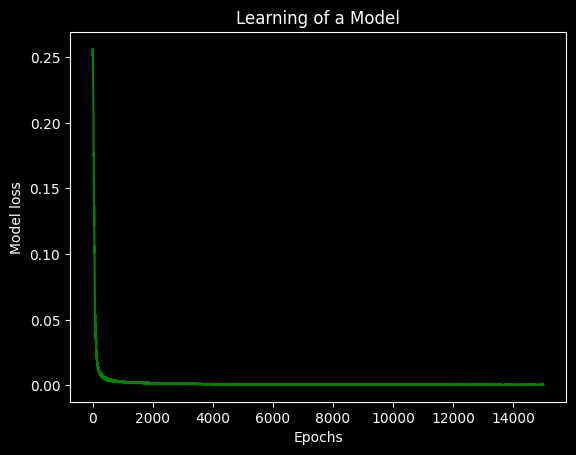

In [14]:
plt.plot(losses, color = 'g', ls = '-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('Learning of a Model')
plt.show()

# Model Testing

In [15]:
X = dataT[:7,:]  # Extracting first seven samples
ypred = model(X)

In [ ]:
X.shape

torch.Size([7, 1, 28, 28])

# Visualizing Test Performance

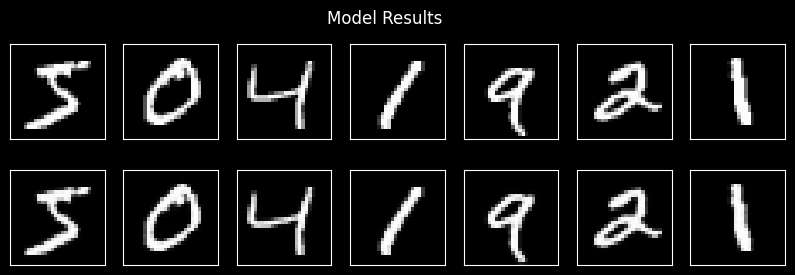

In [16]:
fig,axes = plt.subplots(2,7,figsize=(10,3))

for i in range(7):
  axes[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axes[1,i].imshow(ypred[i,:].view(28,28).detach() ,cmap='gray')
  axes[0,i].set_xticks([]), axes[0,i].set_yticks([])
  axes[1,i].set_xticks([]), axes[1,i].set_yticks([])

plt.suptitle('Model Results')
plt.show()

# Autoencoder as an Image Classifier

# Classification by Autoencoder (Supervised Learning)

In [17]:
class AE_Classifier(nn.Module):
  def __init__(self):
    super().__init__()


    # Encoder Layers

    self.encconv1  = nn.Conv2d(1, 10, 4, padding=1, stride=2) # stride = 2 means not using pooling.

    # Latent Layer

    self.encconv2  = nn.Conv2d(10, 20, 4, padding=1, stride=2)

    # Flatten and classification Layer

    self.fc = nn.LazyLinear(64)

    self.output = nn.Linear(64,10)


  def forward(self,x):

      #  encoder layere
      x = F.leaky_relu( self.encconv1(x) )
      x = F.leaky_relu( self.encconv2(x) )

      x = torch.flatten(x, 1) # Will be used with LazyLinear
      x = self.fc(x)
      x = F.relu(x)
      x = self.output(x)
      return x

# Create Model Instance

In [18]:
model = AE_Classifier()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
model

AE_Classifier(
  (encconv1): Conv2d(1, 10, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (encconv2): Conv2d(10, 20, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (fc): LazyLinear(in_features=0, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

# Read the data for classification purpose

In [22]:
data = pd.read_csv('mnist_train.csv')

In [24]:
data = np.array(data)
data = data[0:10000,:] # Extracting first 10000 samples

In [23]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Extracting Features and Labels

In [25]:
X = data[:,1:]
y = data[:,0]

In [26]:
X.shape

(10000, 784)

In [27]:
X = X.reshape(X.shape[0],1,28,28)

In [28]:
X.shape

(10000, 1, 28, 28)

# Four Important Steps

In [29]:
# Step 1: Convert to pytorch tensor
X_t   = torch.tensor( X, dtype = torch.float32 )
y_t = torch.tensor( y, dtype = torch.long)

# Step 2: Perform Train Test Split and Normalize the data
train_data, test_data, train_labels, test_labels = train_test_split(X_t, y_t, test_size = 0.1)

train_data = train_data/torch.max(train_data)
test_data  = test_data/torch.max(test_data)


# Step 3: Convert into PyTorch Datasets
X_train = TensorDataset(train_data,train_labels)
X_test  = TensorDataset(test_data,test_labels)


# Step 4: Move the data into dataloader objects
batchsize    = 32
train_loader = DataLoader(X_train, batch_size = batchsize, shuffle = True, drop_last=True)
test_loader  = DataLoader(X_test, batch_size = X_test.tensors[0].shape[0])

# For Classification Use GPU

In [30]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Train and Test the Model

In [31]:
epochs = 101

lossfunc = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), momentum = 0.9, lr = 0.01)

model.to(device) # placing a model on GPU

# Initialize losses and Accuracies

losses    = torch.zeros(epochs)
trainAcc  = []
testAcc   = []


# For Loop for epochs

for epoch in range(epochs):
 model.train()

 # Loop for training in batches

 batchAcc  = []
 batchLoss = []

 for X,y in train_loader:

  X = X.to(device) # Placing features on device
  y = y.to(device) # placing labels on device

  ypred = model(X)
  loss = lossfunc(ypred,y)

# Backpropagation

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Append batchloss

  batchLoss.append(loss.item())

  ypred = ypred.cpu() # Back to cpu
  y = y.cpu()

  # compute batch accuracy

  acc = 100 * torch.mean((torch.argmax(ypred, dim=1) == y).float())
  batchAcc.append(acc)

# Batch loop concluded

# Average training accuracy (Outside the batchloop)

 trainAcc.append(np.mean(batchAcc))

# Losses through epochs

 losses[epoch] = np.mean(batchLoss)

# TESTING the model

 model.eval()
 X,y = next(iter(test_loader))
 X = X.to(device)
 y = y.to(device)

 with torch.no_grad(): #This step  Deactivating autogradient
  ypred = model(X)
  ypred = ypred.cpu()
  y = y.cpu()

 # Appending test accuracy

  testAcc.append(100 * torch.mean((torch.argmax(ypred,dim=1)==y).float()))
  if (epoch % 10) == 0:

        print(f' epochs : {epoch}  loss : {loss : 2.2f}')



 epochs : 0  loss :  0.15
 epochs : 10  loss :  0.01
 epochs : 20  loss :  0.00
 epochs : 30  loss :  0.00
 epochs : 40  loss :  0.00
 epochs : 50  loss :  0.00
 epochs : 60  loss :  0.00
 epochs : 70  loss :  0.00
 epochs : 80  loss :  0.00
 epochs : 90  loss :  0.00
 epochs : 100  loss :  0.00


# Visualize Classification Performance

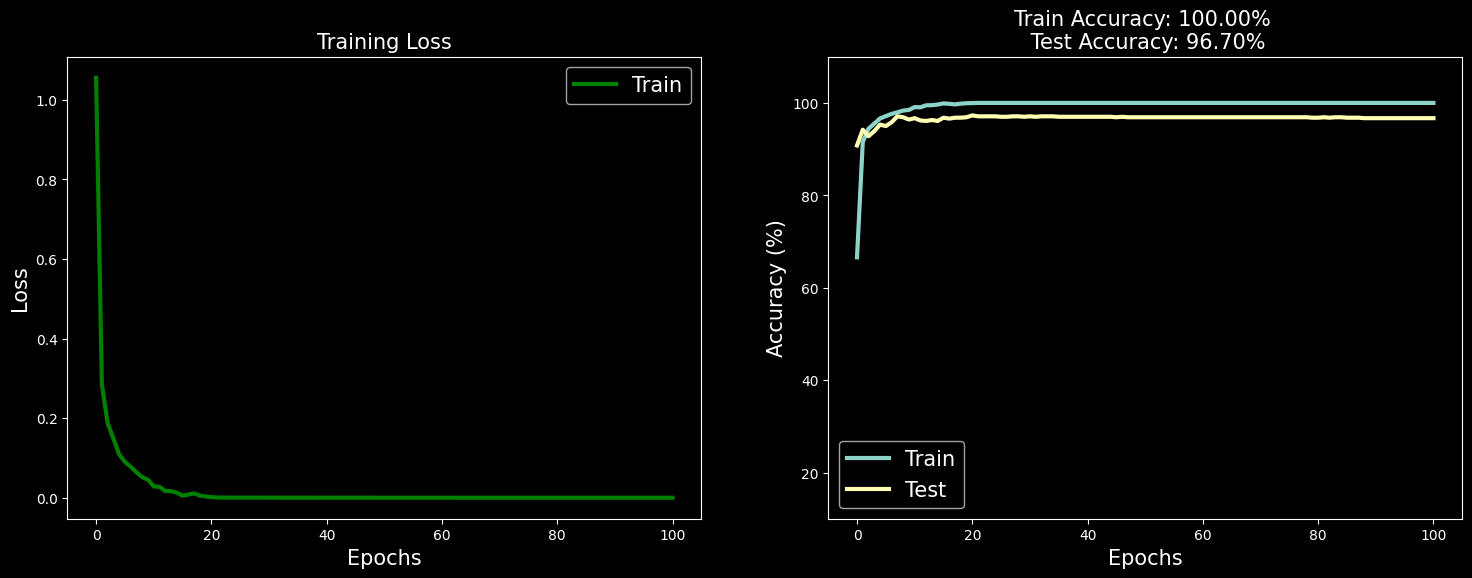

In [32]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(losses, 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)

ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()